In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("../data_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,0.0,84.0,1.0,10.0,950.000000,1074.0,274.986868,782.0,-0.319753,-1.432466,...,1.000000,172.000000,10.000000,9.000000,252.222222,10656.395062,87.777778,10339.061728,135.800000,4315.560000
1,0.0,68.0,0.0,17.0,574.500000,582.0,104.913059,378.0,0.158313,-0.696295,...,0.882353,-15.000000,15.000000,4.000000,158.000000,3944.000000,73.000000,6555.000000,-1.066667,697.528889
2,3.0,61.0,1.0,16.0,593.600000,594.0,4.687572,18.0,0.396421,-0.312612,...,1.000000,-4.000000,16.000000,15.000000,122.400000,2058.773333,12.533333,1360.782222,95.500000,68.750000
3,3.0,50.0,0.0,23.0,420.090909,420.0,3.591772,12.0,-0.021014,-0.856142,...,0.739130,-9.000000,6.000000,4.000000,40.666667,1120.888889,5.333333,1504.888889,12.000000,1464.000000
4,1.0,66.0,1.0,9.0,1068.750000,1075.0,25.118469,76.0,-0.276816,-1.271399,...,1.000000,2.000000,9.000000,8.000000,122.000000,671.000000,19.750000,569.437500,136.444444,43.358025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3.0,32.0,1.0,16.0,615.733333,596.0,51.114860,152.0,2.153820,2.645687,...,0.003757,0.022262,0.003757,0.003757,0.044242,0.044242,0.043021,0.043021,0.037385,0.037385
8512,1.0,65.0,1.0,9.0,1091.500000,1093.0,5.894913,18.0,-0.311206,-1.184514,...,0.888889,-3.000000,9.000000,8.000000,81.428571,1294.530612,-40.000000,1746.285714,155.333333,4722.666667
8513,2.0,44.0,0.0,15.0,654.428571,648.0,107.653355,458.0,0.475616,0.784000,...,1.000000,-4.000000,15.000000,14.000000,77.142857,2213.551020,-1.714286,2686.204082,104.000000,3602.666667
8514,1.0,50.0,1.0,9.0,1075.000000,1083.0,24.535688,66.0,-0.263431,-1.567800,...,1.000000,14.000000,9.000000,8.000000,101.142857,4933.551020,-10.750000,7259.937500,88.222222,202.172840


In [3]:
y_train = df_train.iloc[:,0].values
x_train = df_train.iloc[:,1:].values 

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("../data_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,0.0,77.0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,78.0,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,82.0,1.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,66.0,0.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,85.0,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,89.0,0.0,9.0,1071.250000,1062.0,36.509417,118.0,1.263183,0.543003,...,0.777778,0.000000,9.0,8.0,342.857143,2843.265306,205.142857,11207.836735,96.000000,2281.142857
2126,1.0,48.0,0.0,8.0,1196.000000,1202.0,33.839959,102.0,-0.454057,-1.036905,...,1.000000,-26.000000,8.0,7.0,137.666667,228.555556,87.714286,14282.775510,169.142857,46.693878
2127,3.0,28.0,0.0,16.0,595.600000,590.0,23.734082,82.0,0.371174,-0.657132,...,1.000000,-8.000000,16.0,14.0,102.714286,1270.061224,7.285714,361.489796,90.400000,2186.240000
2128,1.0,56.0,0.0,8.0,1080.285714,996.0,180.470587,448.0,0.587475,-1.363827,...,1.000000,18.000000,8.0,5.0,62.400000,51.840000,-45.200000,0.960000,101.000000,5002.000000


In [7]:
y_test = df_test.iloc[:,0].values
x_test = df_test.iloc[:,1:].values

In [8]:
x_test = scale.transform(x_test)
# x_test = apply_pca(x_test, len(x_test[0]))

In [9]:
model = GradientBoostingClassifier()
params = {
    'loss':['log_loss', 'deviance', 'exponential'],
    'learning_rate':[0.1,1],
    'n_estimators':[100],
    'criterion':['friedman_mse', 'squared_error']
}
GS =GridSearchCV(estimator= model, param_grid=params, cv=10, verbose=5)
GS.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.966 total time= 3.2min
[CV 2/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.959 total time= 2.3min
[CV 3/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.955 total time= 2.2min
[CV 4/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.954 total time= 3.0min
[CV 5/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.958 total time= 3.2min
[CV 6/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.959 total time= 2.2min
[CV 7/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimators=100;, score=0.959 total time= 3.2min
[CV 8/10] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, n_estimator

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [100]},
             verbose=5)

In [11]:
best_model = GS.best_estimator_
y_pred = best_model.predict(x_test)

In [113]:
result_sf

[0.9295499021526419,
 0.9902152641878669,
 0.9906066536203523,
 0.9886497064579256,
 0.9886497064579256]

In [116]:
max(result_sf)

0.9906066536203523

In [117]:
# Create based model
def createBasedModel():
    level0 = list()
    level0.append(('RF', RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt', n_estimators=1000)))
    level0.append(('AB', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=100)))
    level0.append(('GB', GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.1,loss= 'log_loss',n_estimators= 100)))
    level0.append(('XGB', XGBClassifier(gamma= 0.2,learning_rate= 0.1,max_depth= 4,min_child_weight= 1,n_estimators= 100)))
    level0.append(('LGB', LGBMClassifier(boosting= 'dart', data_sample_strategy= 'bagging', estimators= 50, learning_rate=0.1, objective= 'multiclass')))


    level1 = list()
    level1.append(('LR', LogisticRegression(C= 10, max_iter= 100, penalty= 'l1', solver= 'liblinear')))
    level1.append(('SVM', SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)))
    level1.append(('DT', DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
    level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, p= 1, weights= 'uniform')))
    level1.append(('CB', CatBoostClassifier(iterations= 200, learning_rate=0.1)))
    return level0, level1

In [118]:
# Create new data with two class model
def createNewData(x_train, y_train, x_test, y_test, level0, level1):
    kf = KFold(n_splits=20,random_state=None)

    train_news = np.empty((x_train.shape[0], 0))
    test_news = np.empty((x_test.shape[0], 0))
    # First class
    for name, model in level0:
        print(f"Model: {name}")
        print("----------------")
        train_model = []
        for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
            print(f"Fold {i}")
            print(f"train: {len(train_index)}")
            print(f"test: {len(test_index)}")
            # Train model in 4/5
            model.fit(x_train[train_index], y_train[train_index])
            # predict model in 1/5
            y_pred = model.predict(x_train[test_index])
            train_model.extend(y_pred)
        # Predict on test set
        model.fit(x_train, y_train)
        test_model = model.predict(x_test)
        # Add column to news data
        train_news = np.column_stack((train_news, np.array(train_model).reshape(-1, 1)))
        test_news = np.column_stack((test_news, np.array(test_model).reshape(-1, 1)))
        print("-------Done-------")

    # Second class
    train_news_final = np.empty((train_news.shape[0], 0))
    test_news_final = np.empty((test_news.shape[0], 0))

    for name, model in level1:
        print(f"Model: {name}")
        print("----------------")
        train_model = []
        for i,(train_index, test_index) in enumerate(kf.split(train_news, y_train)):
            print(f"Fold {i}")
            # Train model in 4/5
            model.fit(train_news[train_index], y_train[train_index])
            # predict model in 1/5
            y_pred = model.predict(train_news[test_index])
            train_model.extend(y_pred)
        # Predict on test set
        model.fit(train_news, y_train)
        test_model = model.predict(test_news)
        # Add column to news data
        train_news_final = np.column_stack((train_news_final, np.array(train_model).reshape(-1, 1)))
        test_news_final = np.column_stack((test_news_final, np.array(test_model).reshape(-1, 1)))
        print("-------Done-------")
    return train_news_final, test_news_final

In [119]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score
def confusion_matrix_scorer(clf=None,X=None, y=None):
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    return {'acc':acc}

In [120]:
NUMBER_FOLD = 10
def create_df_val(rank,rs_cv):
    df_val = {
        "ACC":[],
        "params":[]
    }
    for i in range(NUMBER_FOLD):
        str_label = f"split{i}"
        df_val["ACC"].append(np.array(rs_cv[str_label+"_test_acc"]))
        df_val["params"].append(rs_cv["params"])
    df_val["ACC"] = np.array(df_val["ACC"] ).flatten()
    df_val["params"] = np.array(df_val["params"] ).flatten()
    df_combine_val = pd.DataFrame(df_val).dropna(axis=0).sort_values(by="ACC",ascending=False)
    if df_combine_val.shape[0]>0:
        gene_top =  df_combine_val.iloc[0,:].values
        return [rank,gene_top[0],gene_top[1]]
    else:
        return []

In [51]:
# Model tunning
def GSmodel():
    meta_model = RandomForestClassifier()
    params = {
        'n_estimators': [10,50,100,1000],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [3,4,5],
        'max_features':['sqrt', 'log2'],
    }
    ss = StratifiedShuffleSplit(n_splits=NUMBER_FOLD,test_size=0.3,random_state=11)
    grid_search = GridSearchCV(estimator=meta_model, param_grid=params, 
                              cv=ss, verbose=5, return_train_score=True,refit=False)
    return grid_search

In [121]:
model = RandomForestClassifier()
level0, level1 = createBasedModel()
train_news_final, test_news_final = createNewData(x_train[:,:len(ranks[2])], y_train, x_test[:,:len(ranks[2])], y_test, level0, level1)
model.fit(train_news_final,y_train)
y_pred = model.predict(test_news_final)

Model: RF
----------------
Fold 0
train: 8090
test: 426
Fold 1
train: 8090
test: 426
Fold 2
train: 8090
test: 426
Fold 3
train: 8090
test: 426
Fold 4
train: 8090
test: 426
Fold 5
train: 8090
test: 426
Fold 6
train: 8090
test: 426


In [52]:
ranks[0]

[212,
 195,
 233,
 4,
 6,
 191,
 2,
 149,
 214,
 215,
 192,
 172,
 174,
 90,
 151,
 216,
 170,
 213,
 24,
 235,
 193,
 171,
 26,
 194,
 18,
 237,
 234,
 23,
 129,
 131,
 65,
 230,
 19,
 130,
 249,
 89,
 152,
 3,
 132,
 25,
 150,
 125,
 5,
 173,
 236,
 87,
 27,
 128,
 153,
 229,
 60,
 86,
 109,
 108,
 228,
 68,
 45,
 111,
 69,
 208,
 209,
 144,
 110,
 47,
 0,
 20,
 133,
 112,
 66,
 88,
 107,
 251,
 207,
 48,
 238,
 154,
 186,
 28,
 165,
 250,
 175]

In [65]:
x_train[:,:len(ranks[6])+1]

array([[5.10673054e-01, 5.78141898e-03, 4.58552632e-01, ...,
        5.74468085e-01, 4.75851538e-01, 3.44857143e-01],
       [4.84389348e-01, 3.51945127e-04, 4.08147773e-01, ...,
        3.93617021e-01, 4.44164336e-01, 3.17111111e-01],
       [5.28708134e-01, 2.36053532e-04, 4.25207756e-01, ...,
        7.65957447e-01, 2.26226454e-01, 3.92400000e-01],
       ...,
       [7.33766234e-01, 6.25881761e-04, 6.04323308e-01, ...,
        5.74468085e-01, 5.16712163e-01, 3.07500000e-01],
       [2.76859504e-01, 2.93031288e-03, 2.25657895e-01, ...,
        7.55319149e-01, 4.85355791e-01, 2.53090909e-01],
       [2.55165289e-01, 4.05216713e-03, 2.06414474e-01, ...,
        6.59574468e-01, 5.08784967e-01, 3.07333333e-01]])

In [74]:
ls_result = []
# Create based model
level0, level1 = createBasedModel()
for i,rank in enumerate(ranks):
    print(f"SFS {i}:")
    # Create Data news
    train_news_final, test_news_final = createNewData(x_train[:,:len(rank)], y_train, x_test[:,:len(rank)], y_test, level0, level1)

    # Get model GS
    # GS = GSmodel()
    # print(GS)
    # Tunning model
    meta_model = KNeighborsClassifier()
    params = {
    'n_neighbors': [4,5,6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3]
}
    # ss = StratifiedShuffleSplit(n_splits=NUMBER_FOLD,test_size=0.3,random_state=11)
    grid_search = GridSearchCV(estimator=meta_model, param_grid=params, 
                              cv=10, verbose=5, scoring=confusion_matrix_scorer,return_train_score=True,refit=False)
    grid_model = grid_search.fit(train_news_final,y_train)
    rs_cv = grid_model.cv_results_
    # ls_result.append(rs_cv)
    ls_result.append(create_df_val(rank,rs_cv))
    # Fix evaluation model
    

SFS 0:
Model: RF
----------------
Fold 0
train: 8059
test: 425
Fold 1
train: 8059
test: 425
Fold 2
train: 8059
test: 425
Fold 3
train: 8059
test: 425
Fold 4
train: 8060
test: 424
Fold 5
train: 8060
test: 424
Fold 6
train: 8060
test: 424
Fold 7
train: 8060
test: 424
Fold 8
train: 8060
test: 424
Fold 9
train: 8060
test: 424
Fold 10
train: 8060
test: 424
Fold 11
train: 8060
test: 424
Fold 12
train: 8060
test: 424
Fold 13
train: 8060
test: 424
Fold 14
train: 8060
test: 424
Fold 15
train: 8060
test: 424
Fold 16
train: 8060
test: 424
Fold 17
train: 8060
test: 424
Fold 18
train: 8060
test: 424
Fold 19
train: 8060
test: 424
-------Done-------
Model: AB
----------------
Fold 0
train: 8059
test: 425
Fold 1
train: 8059
test: 425
Fold 2
train: 8059
test: 425
Fold 3
train: 8059
test: 425
Fold 4
train: 8060
test: 424
Fold 5
train: 8060
test: 424
Fold 6
train: 8060
test: 424
Fold 7
train: 8060
test: 424
Fold 8
train: 8060
test: 424
Fold 9
train: 8060
test: 424
Fold 10
train: 8060
test: 424
Fold 11
tr

In [75]:
df_result_val = pd.DataFrame(ls_result)
df_result_val.columns = ["Feature","ACC","Params"]
df_result_val.iloc[:,1] = round(df_result_val.iloc[:,1] * 100,2)
df_result_val

,Feature,ACC,Params
0,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
1,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
2,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
3,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
4,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
5,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."
6,"[212, 195, 233, 4, 6, 191, 2, 149, 214, 215, 1...",100.0,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1..."


In [76]:
params_op = df_result_val[df_result_val['ACC'] == max(df_result_val['ACC'])]["Params"].values[0]
gene_op = df_result_val[df_result_val['ACC'] == max(df_result_val['ACC'])]["Feature"].values
params_op

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

In [77]:
# params_op = {'algorithm': 'brute', 'n_neighbors': 4, 'p': 3, 'weights': 'uniform'}

In [78]:
# gene_op = [138, 170, 184, 24, 169, 183, 118, 4, 42, 197, 198, 137, 154, 3, 61, 153, 62, 98, 76, 186, 156, 140, 78, 41, 23, 185, 155, 182, 6, 168, 172, 64, 200, 26, 60, 199, 77, 97, 171, 80, 196, 117, 119, 79, 2, 5, 116, 120, 100, 139, 99, 25, 152, 107, 22, 130, 32, 126, 63, 0, 136, 44, 43, 127, 18, 19, 147, 37, 148, 204, 17, 36, 177, 113, 190, 193, 35, 31, 150, 12, 111, 192, 160, 166, 55, 164, 16, 125, 178, 207, 133, 86, 179, 132, 112, 40, 205, 162, 34, 15, 101, 176, 144, 57, 33, 110, 167, 14, 109, 146, 96, 71, 13, 7, 104, 173, 157, 81, 90, 108, 45, 91, 141, 121, 187, 27, 151, 88, 191, 74, 92, 161, 52, 188, 165, 131, 128, 73, 149, 194, 75, 11, 39, 145, 206, 38, 201, 106, 10, 21, 59, 142, 124, 174, 8, 115, 65, 87, 84, 105, 114, 49, 163, 175, 47, 85, 135, 211, 189, 67, 180, 213, 70, 51, 48, 123, 56, 30, 103, 129, 158, 212, 195, 95, 208, 181, 89, 69, 53, 143, 66, 122, 134, 72, 94, 50, 102, 93, 209, 210, 54, 202, 9, 203, 28, 20, 159, 68]

In [79]:
len(gene_op)

7

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

In [81]:
level0, level1 = createBasedModel()

In [82]:
best_model = KNeighborsClassifier(n_neighbors= params_op['n_neighbors'], algorithm= params_op['algorithm'], p= params_op['p'], weights= params_op['weights'])
i = len(gene_op)
# Create Data news
train_news_final, test_news_final = createNewData(x_train[:,:i], y_train, x_test[:,:i], y_test, level0, level1)
best_model.fit(train_news_final,y_train)
y_pred = best_model.predict(test_news_final)

Model: RF
----------------
Fold 0
train: 8059
test: 425
Fold 1
train: 8059
test: 425
Fold 2
train: 8059
test: 425
Fold 3
train: 8059
test: 425
Fold 4
train: 8060
test: 424
Fold 5
train: 8060
test: 424
Fold 6
train: 8060
test: 424
Fold 7
train: 8060
test: 424
Fold 8
train: 8060
test: 424
Fold 9
train: 8060
test: 424
Fold 10
train: 8060
test: 424
Fold 11
train: 8060
test: 424
Fold 12
train: 8060
test: 424
Fold 13
train: 8060
test: 424
Fold 14
train: 8060
test: 424
Fold 15
train: 8060
test: 424
Fold 16
train: 8060
test: 424
Fold 17
train: 8060
test: 424
Fold 18
train: 8060
test: 424
Fold 19
train: 8060
test: 424
-------Done-------
Model: AB
----------------
Fold 0
train: 8059
test: 425
Fold 1
train: 8059
test: 425
Fold 2
train: 8059
test: 425
Fold 3
train: 8059
test: 425
Fold 4
train: 8060
test: 424
Fold 5
train: 8060
test: 424
Fold 6
train: 8060
test: 424
Fold 7
train: 8060
test: 424
Fold 8
train: 8060
test: 424
Fold 9
train: 8060
test: 424
Fold 10
train: 8060
test: 424
Fold 11
train: 80

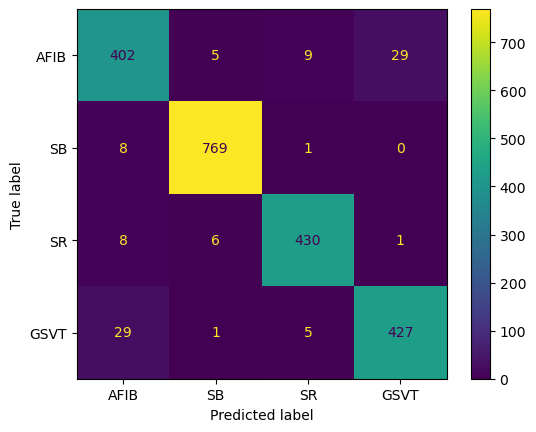

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.958685,0.903371,0.899329,0.901345,0.973294
1,SB,0.990141,0.988432,0.984635,0.986530,0.991124
2,SR,0.985915,0.966292,0.966292,0.966292,0.991098
3,GSVT,0.969484,0.924242,0.934354,0.929271,0.982014
4,macro avg,NaN,0.945860,0.946153,0.945584,NaN
5,micro avg,NaN,0.952113,0.952113,0.952113,NaN
6,weighted avg,NaN,0.952085,0.952075,0.952113,NaN


In [13]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [14]:
df_evaluation_test.to_csv("../Result/GBT.csv")